# CPC251 Machine Learning and Computational Intelligence
## Assignment 1 Part 2
## Group 3_Cardio
### Group members:
### 1. FARZANA AMIRAH BINTI FAUZI AL-AQSA
### 2. NOOR MAISARAH BINTI GHAZALI
### 3. SITI SAKINAH BINTI AHMAD SANUSI
### 4. TEOH SIN YEE

##### import all libraries needed.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

##### read the dataset

In [2]:
auto= pd.read_csv('auto_mpg.csv', sep=';')
auto.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320


##### check dataset info

In [3]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


##### labelencoder created to encode car_name with a value between 0 and n_classes-1. In our case n_classes for Car name is 305

In [36]:
labelencoder = LabelEncoder()
X_en= auto.iloc[:, 8].values
X_en = labelencoder.fit_transform(X_en)

##### x = input features, y = target variable

In [5]:
X= auto.iloc[:,1:7]
X['Car'] = X_en
y= auto.iloc[:,0].values

##### create dataset with all input features after converting them to numeric including target variables

In [6]:
full_data= X.copy()
full_data['mpg']= y
full_data.head(2)

,cylinders,displacement,horsepower,weight,acceleration,model_year,Car,mpg
0,8,307.0,130.0,3504.0,12.0,70,49,18.0
1,8,350.0,165.0,3693.0,11.5,70,36,15.0


### _1. Performing feature selection on the dataset using filter method._
##### Identify input features with high correlation with target variable

In [7]:
#print correlation of each input feature with target variable
importances = full_data.drop("mpg", axis=1).apply(lambda x: x.corr(full_data.mpg))
indices = np.argsort(importances)
print(importances[indices])

weight         -0.831741
displacement   -0.804203
horsepower     -0.777428
cylinders      -0.775396
Car             0.273936
acceleration    0.420289
model_year      0.579267
dtype: float64


##### plotting the datas into a graph

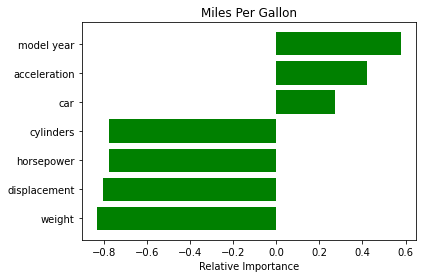

In [8]:
names=['cylinders','displacement','horsepower','weight','acceleration','model year', 'car']
plt.title('Miles Per Gallon')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

##### only keep the input features with high correlation with target variable. it gives impact to the target variable prediction. below is the criteria to choose the right input features.
##### set threshold to absolute value of 0.4. if the correlation of input feature with target variable is greater than 0.4, these input features will be chosen. 

In [9]:
for i in range(0, len(indices)):
    if np.abs(importances[i])>0.4:
        print(names[i])

cylinders
displacement
horsepower
weight
acceleration
model year


##### only car_name is dropped since it does not have high correlation with mpg. the input features is reduce by 1. 

In [10]:
X= auto[ ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']]

##### Step 2 of Filter Method
##### Comparing each input features to each other. Keep input features that not correlate to each other.

In [11]:
for i in range(0,len(X.columns)):
    for j in  range(0,len(X.columns)):
        if i!=j:
            corr_1=np.abs(X[X.columns[i]].corr(X[X.columns[j]]))
            if corr_1 <0.3:
                print( X.columns[i] , " is not correlated  with ", X.columns[j])
            elif corr_1>0.75:
                print( X.columns[i] , " is highly  correlated  with ", X.columns[j])

cylinders  is highly  correlated  with  displacement
cylinders  is highly  correlated  with  horsepower
cylinders  is highly  correlated  with  weight
displacement  is highly  correlated  with  cylinders
displacement  is highly  correlated  with  horsepower
displacement  is highly  correlated  with  weight
horsepower  is highly  correlated  with  cylinders
horsepower  is highly  correlated  with  displacement
horsepower  is highly  correlated  with  weight
weight  is highly  correlated  with  cylinders
weight  is highly  correlated  with  displacement
weight  is highly  correlated  with  horsepower
acceleration  is not correlated  with  model_year
model_year  is not correlated  with  acceleration


##### model_year and acceleration is not correlated to each other. 
##### displacement, horsepower, cylinder, and weight are highly correlated. Keep only one of them. 
##### Based on the results, cylinders is chosen. Other input features is removed.

In [12]:
X= auto[ ['cylinders', 'acceleration', 'model_year']]

##### Step 3 of Filter Method
##### Find information gain/mutual information of the chosen input features with the target variable.

In [13]:
mi = mutual_info_regression(X, y)

##### Plotting the mutual information

<AxesSubplot:>

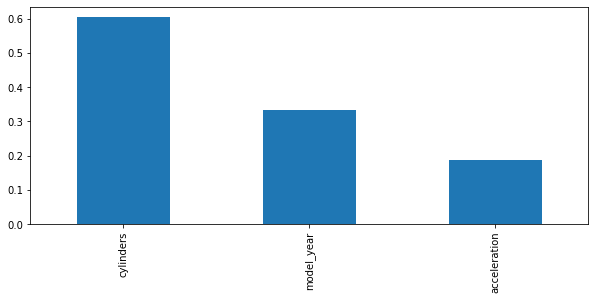

In [14]:
mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi.sort_values(ascending=False).plot.bar(figsize=(10, 4))

##### The features selection is finished. These input features will be used for mpg prediction.

### _2. Building a predictive model using Support Vector Machine algorithm._
##### Based on the feature selection above, MPG can be predicted based on the number of cylinders in the car, the year car was manufactured ad the acceleration.

<AxesSubplot:xlabel='mpg', ylabel='Density'>

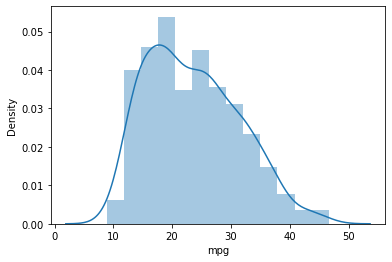

In [15]:
sns.distplot(auto['mpg'])

##### from the histogram of mpg, the data is moderately skewed to the right which means that the there are more number of cars with low mpg than those with high mpg.

<AxesSubplot:xlabel='model_year', ylabel='mpg'>

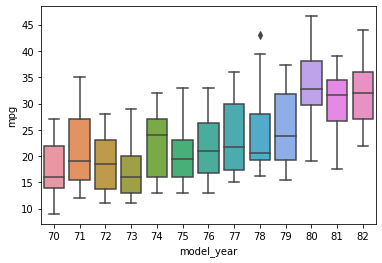

In [16]:
sns.boxplot(x='model_year', y='mpg', data=auto)

##### the graph above shows that mpg changes with respect to year

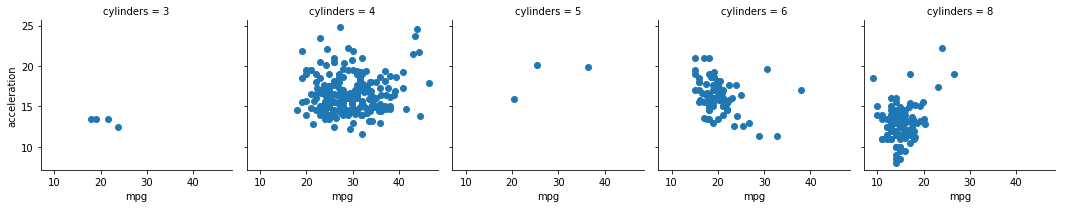

In [17]:
g = sns.FacetGrid(data=auto, col='cylinders')
g.map(plt.scatter, 'mpg','acceleration').add_legend()

##### the graphs above show mpg and acceleration varies with the number of cylinders

<AxesSubplot:xlabel='acceleration', ylabel='Density'>

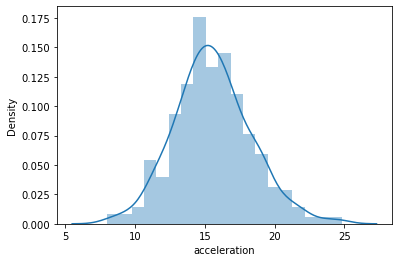

In [18]:
sns.distplot(auto['acceleration'])

##### The distribution of acceleration shows normal distribution.

<AxesSubplot:xlabel='cylinders', ylabel='Density'>

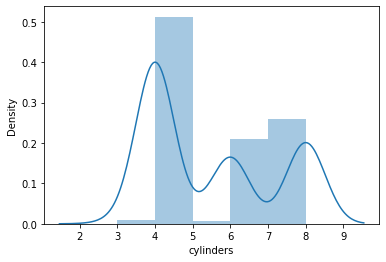

In [19]:
sns.distplot(auto['cylinders'])

##### The distribution for cylinders is discrete.

##### splitting the dataset into training and testing data

In [20]:
features_list_m1 = ['cylinders', 'acceleration', 'model_year']
X1 = auto[features_list_m1]
y1 = auto['mpg']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=24)

##### creating SVM model for regression with linear kernel and fit the model

In [21]:
regr1 = SVR(kernel='linear')
regr1.fit(X1_train, y1_train)
regr1.score(X1_train, y1_train)

0.7124973644533781

In [22]:
regr1.coef_

array([[-3.49903153, -0.56005971,  0.71856938]])

##### use the model to predict the values of mpg

In [23]:
predicted_values_m1 = regr1.predict(X1_test)

##### visualizing the comparison between predicted and actual value of mpg using graph

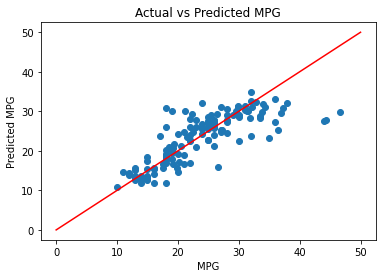

In [24]:
plt.scatter(y1_test, predicted_values_m1)
plt.xlabel('MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs Predicted MPG')
# plot a line, a perfect prediction would all fall on this line
x = np.linspace(0, 50, 100)
y = x
plt.plot(x, y, 'r')

##### calculate and print the errors of prediction (mean absolute error, mean squared error and R-squared value).

In [25]:
print(mean_absolute_error(y1_test, predicted_values_m1))
print(mean_squared_error(y1_test, predicted_values_m1))
print(r2_score(y1_test, predicted_values_m1))

3.14453113345217
21.268051105084776
0.6105890589512998


##### creating SVM model for regression with RBF kernel and fit the model

In [26]:
regr2 = SVR(kernel='rbf')
regr2.fit(X1_train, y1_train)
regr2.score(X1_train, y1_train)

0.2208247607848296

##### use the model to predict the values of mpg

In [27]:
predicted_values_m2 = regr2.predict(X1_test)

##### visualizing the comparison between predicted and actual value of mpg using graph

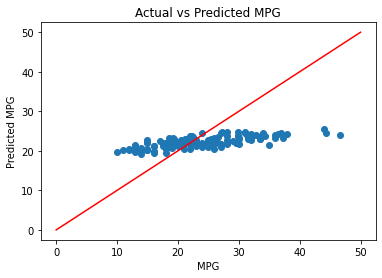

In [28]:
plt.scatter(y1_test, predicted_values_m2)
plt.xlabel('MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs Predicted MPG')
# plot a line, a perfect prediction would all fall on this line
x = np.linspace(0, 50, 100)
y = x
plt.plot(x, y, 'r')

##### calculate and print the errors of prediction (mean absolute error, mean squared error and R-squared value).

In [29]:
print(mean_absolute_error(y1_test, predicted_values_m2))
print(mean_squared_error(y1_test, predicted_values_m2))
print(r2_score(y1_test, predicted_values_m2))

5.313173258101301
43.68397625999519
0.20016092588348133


##### creating SVM model for regression with polynomial kernel and fit the model

In [30]:
regr3 = SVR(kernel='poly')
regr3.fit(X1_train, y1_train)
regr3.score(X1_train, y1_train)

0.5346536396820367

##### use the model to predict the values of mpg

In [31]:
predicted_values_m3 = regr3.predict(X1_test)

##### visualizing the comparison between predicted and actual value of mpg using graph

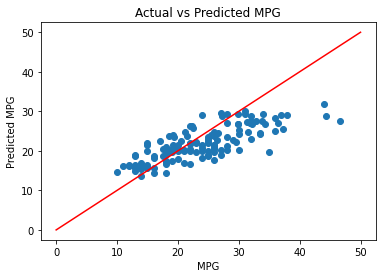

In [32]:
plt.scatter(y1_test, predicted_values_m3)
plt.xlabel('MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs Predicted MPG')
# plot a line, a perfect prediction would all fall on this line
x = np.linspace(0, 50, 100)
y = x
plt.plot(x, y, 'r')

##### calculate and print the errors of prediction (mean absolute error, mean squared error and R-squared value).

In [33]:
print(mean_absolute_error(y1_test, predicted_values_m3))
print(mean_squared_error(y1_test, predicted_values_m3))
print(r2_score(y1_test, predicted_values_m3))

4.136307211588947
28.037180881959078
0.4866485444458033


##### The difference of MPG prediction based on SVR kernel model

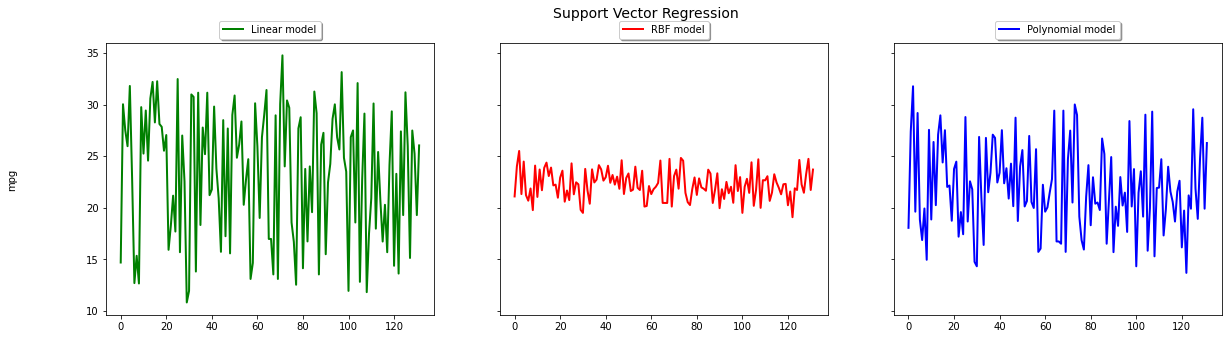

In [34]:
lw = 2

svrs = [regr1, regr2, regr3]
kernel_label = ['Linear', 'RBF', 'Polynomial']
model_color = ['g', 'r', 'b']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(svr.fit(X1_train, y1_train).predict(X1_test), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.06, 0.5, 'mpg', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

##### error of predictions graph

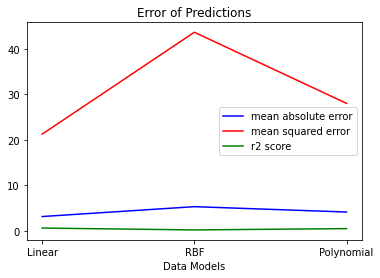

In [46]:
kernel_label = ['Linear', 'RBF', 'Polynomial']
model_r2s = [r2_score(y1_test, predicted_values_m1), r2_score(y1_test, predicted_values_m2), r2_score(y1_test, predicted_values_m3)]
model_mae = [mean_absolute_error(y1_test, predicted_values_m1), mean_absolute_error(y1_test, predicted_values_m2), mean_absolute_error(y1_test, predicted_values_m3)]
model_mse = [mean_squared_error(y1_test, predicted_values_m1), mean_squared_error(y1_test, predicted_values_m2), mean_squared_error(y1_test, predicted_values_m3)]
plt.plot(kernel_label, model_mae, color = 'blue', label = 'mean absolute error')
plt.plot(kernel_label, model_mse, color = 'red', label = 'mean squared error')
plt.plot(kernel_label, model_r2s, color = 'green', label = 'r2 score')
plt.title('Error of Predictions')
plt.xlabel('Data Models')
plt.legend()
plt.show()

# Conclusion
##### Among the three predictive model,  linear kernel has the best SVM predictive model since it has the lowest mean squared error and mean absolute error compared to polynomial and RBF kernels which means that the model has lowest error value. Linear also has r-squared value that is between 0.5 and 1 and shown the highest model score among the three models. Hence, linear SVR model is the best predictive model.